<a href="https://colab.research.google.com/github/chutimaq/BasicProg_DataViz65/blob/main/midterm_dpdm22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## การเตรียมข้อมูลประกอบด้วย กำจัด outlier, แก้ missing, normalization, one-hot-encoder และ อื่นๆ ที่นักศึกษาเห็นว่าเหมาะสม

# 1 ทำนายราคาบ้าน 10 คะแนน
เตรียมข้อมูลเพื่อทำนายราคาบ้าน ราคาประเมินบ้าน และ คะแนนทรัพย์ จาก [google drive](https://drive.google.com/drive/folders/1uIcUFY1yldIq-A3wijh2n2N6az-EljIe?usp=sharing) โดยข้อมูลที่เตรียมต้องประกอบด้วย columns ต่อไปนี้

* ```'renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price'``` จากตาราง "คำตอบนักประเมิน(ID)"

* ```จำนวน 7-11 และ โรงเรียน ในรัศมี 200,500,1000,2000 เมตร (ตั้งชื่อ d200-7/11','d500-7/11',...,'d2000-7/11' แบะ ;d200-school','d500-school',...,'d2000-school')``` จากตาราง "7-eleven.json" และ "school.json"

* ```ประเมินราคาซื้อขาย และ คะแนนทรัพย์ (ตั้งชื่อ 'estimator' และ 'score')``` จากตาราง คำตอบนักประเมิน(ID) โดยราคาประเมินกับคะแนนทรัพย์ อ้างอิงของนักประเมิน ID=01 คนเดียว

In [79]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import pandas as pd
import numpy as np
from pandas.io import json

from google.colab import drive
drive.mount('/content/drive')

## import file  

#คำตอบนักประเมิน(ID)
link1 = 'https://docs.google.com/spreadsheets/d/1u9-JTqxFkCzJYPQo-3Dg_GZjfcF_XNDNtf1mtr0dpdI/export?format=xlsx'
detachedhouse = pd.read_excel(link1,sheet_name='บ้าน')
secondhand = pd.read_excel(link1,sheet_name='secondhand')

#Data House
link2 = 'https://docs.google.com/spreadsheets/d/1mY0fjGc5OMCsl6qlaGjfTKGVB3ZE2sFg3QDSdxh2nfY/export?format=xlsx'
H1 = pd.read_excel(link2,sheet_name='บ้านมือ1')
H2 = pd.read_excel(link2,sheet_name='บ้านมือ2')

#7-eleven.json
with open('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/7-eleven.json') as json_file:
  seven = json.loads(json_file.read())

#school.json
with open('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/school.json') as json_file:
  school = json.loads(json_file.read())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###เพิ่มคอลัมน์ Second_hand

In [81]:
H1['second_hand']= '1'
H2['second_hand']= '2'

In [82]:
H = pd.concat([H1,H2])

In [98]:
H

,id,parent_id,project_name,province,district,sub_district,zip_code,zone_id,zone,property_type,...,land wide(m),land long(m),topsoil,corner,alley,has_pool,has_keycard,has_security,has_fitness,has_garden
0,314.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,315.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านแฝด,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,316.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,317.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,318.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,20460P,NaN,NaN,ขอนแก่น,บ้านฝาง,หนองบัว,NaN,NaN,NaN,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1652,20462P,NaN,NaN,ขอนแก่น,หนองเรือ,โนนทอง,NaN,NaN,NaN,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1653,20463P,NaN,NaN,ขอนแก่น,แวงน้อย,ก้านเหลือง,NaN,NaN,NaN,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654,20466P,NaN,NaN,ขอนแก่น,ชุมแพ,วังหินลาด,NaN,NaN,NaN,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
H.columns

Index(['id', 'parent_id', 'project_name', 'province', 'district',
       'sub_district', 'zip_code', 'zone_id', 'zone', 'property_type',
       ...
       'land wide(m)', 'land long(m)', 'topsoil', 'corner', 'alley',
       'has_pool', 'has_keycard', 'has_security', 'has_fitness', 'has_garden'],
      dtype='object', length=156)

In [97]:
#House = H[['latitude','longitude','renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price','second_hand']]
#House

In [100]:
H.isnull()

,id,parent_id,project_name,province,district,sub_district,zip_code,zone_id,zone,property_type,...,land wide(m),land long(m),topsoil,corner,alley,has_pool,has_keycard,has_security,has_fitness,has_garden
0,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,False,True,True,False,False,False,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
1652,False,True,True,False,False,False,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
1653,False,True,True,False,False,False,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
1654,False,True,True,False,False,False,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True


In [101]:
H.fillna(0)

,id,parent_id,project_name,province,district,sub_district,zip_code,zone_id,zone,property_type,...,land wide(m),land long(m),topsoil,corner,alley,has_pool,has_keycard,has_security,has_fitness,has_garden
0,314.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,0.0,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,0.0,0.0,0,0,0,0,0,0,0,0
1,315.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,0.0,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านแฝด,...,0.0,0.0,0,0,0,0,0,0,0,0
2,316.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,0.0,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,0.0,0.0,0,0,0,0,0,0,0,0
3,317.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,0.0,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,0.0,0.0,0,0,0,0,0,0,0,0
4,318.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,0.0,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,20460P,0,0,ขอนแก่น,บ้านฝาง,หนองบัว,0.0,0.0,0,บ้านเดี่ยว,...,0.0,0.0,0,0,0,0,0,0,0,0
1652,20462P,0,0,ขอนแก่น,หนองเรือ,โนนทอง,0.0,0.0,0,บ้านเดี่ยว,...,0.0,0.0,0,0,0,0,0,0,0,0
1653,20463P,0,0,ขอนแก่น,แวงน้อย,ก้านเหลือง,0.0,0.0,0,บ้านเดี่ยว,...,0.0,0.0,0,0,0,0,0,0,0,0
1654,20466P,0,0,ขอนแก่น,ชุมแพ,วังหินลาด,0.0,0.0,0,บ้านเดี่ยว,...,0.0,0.0,0,0,0,0,0,0,0,0


### 7-11

In [102]:
import json
import numpy as np

In [117]:
seven['6']

[{'business_status': 'OPERATIONAL',
  'geometry': {'location': {'lat': 16.0603149, 'lng': 102.7264856},
   'viewport': {'northeast': {'lat': 16.06160307989272,
     'lng': 102.7278208298927},
    'southwest': {'lat': 16.05890342010728, 'lng': 102.7251211701073}}},
  'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/shopping-71.png',
  'icon_background_color': '#4B96F3',
  'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/convenience_pinlet',
  'name': '7-Eleven',
  'opening_hours': {'open_now': True},
  'photos': [{'height': 3072,
    'html_attributions': ['<a href="https://maps.google.com/maps/contrib/100135907463246314962">nuttapong chinnapuk</a>'],
    'photo_reference': 'ARywPAIuwYgKEeh9_5vpztMT_JbNv0OakveKoYeKCVvX2RyHmpDJw1w05XJIVVx9w5h9Aoai9Gb67AywD7szMyKpXsSzRol2DkngoztlEQu6goN6W2TsbB45jN-38BigXeivHTE4go3fzzTT5urf1wmSYgGzWw4g2IeDHCXM1oHEXvmTRk0Y',
    'width': 1728}],
  'place_id': 'ChIJzbBjEk2BGDER4YEKqD5kwlI',
  'rating': 4,
  'refe

In [118]:
seven_id = {}
for t in seven:
    l = list()
    for x in seven[t]:
        l.append(x['geometry']['location'])
    print(t)
    print(l)
    seven_id[t] = l

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
6284
[]
6285
[{'lat': 16.3280289, 'lng': 102.8466104}]
6286
[]
6289
[]
6290
[]
6291
[{'lat': 16.760925, 'lng': 102.6348166}]
6292
[{'lat': 16.3280289, 'lng': 102.8466104}]
6296
[{'lat': 16.5219606, 'lng': 102.219816}]
6297
[]
6298
[{'lat': 16.4501543, 'lng': 102.7382279}, {'lat': 16.4481776, 'lng': 102.7736213}, {'lat': 16.4496233, 'lng': 102.7578029}, {'lat': 16.4512684, 'lng': 102.7517798}]
6302
[]
6306
[]
6310
[]
6311
[]
6313
[{'lat': 16.4506978, 'lng': 102.7955315}, {'lat': 16.4786388, 'lng': 102.814293}, {'lat': 16.4794698, 'lng': 102.8070934}, {'lat': 16.4423, 'lng': 102.808299}, {'lat': 16.4802561, 'lng': 102.8118345}, {'lat': 16.4800345, 'lng': 102.817991}, {'lat': 16.4800801, 'lng': 102.8157501}, {'lat': 16.4421359, 'lng': 102.8198991}, {'lat': 16.4781927, 'lng': 102.8199828}, {'lat': 16.4463944, 'lng': 102.8200097}]
6316
[]
6319
[{'lat': 16.7035329, 'lng': 103.0785806}, {'lat': 16.7009297, 'lng': 103.0838363}, {'lat': 1

In [119]:
seven_id

{'1': [],
 '4': [],
 '6': [{'lat': 16.0603149, 'lng': 102.7264856},
  {'lat': 16.0564741, 'lng': 102.7268436},
  {'lat': 16.0595413, 'lng': 102.7294307},
  {'lat': 16.0751998, 'lng': 102.7356017},
  {'lat': 16.070648, 'lng': 102.7344055},
  {'lat': 16.0582995, 'lng': 102.7360953},
  {'lat': 16.0573901, 'lng': 102.7192322}],
 '7': [],
 '9': [],
 '11': [{'lat': 15.809535, 'lng': 102.6069684},
  {'lat': 15.8193062, 'lng': 102.6012589},
  {'lat': 15.8125848, 'lng': 102.6009202},
  {'lat': 15.8102763, 'lng': 102.5985417},
  {'lat': 15.8095537, 'lng': 102.5879272},
  {'lat': 15.7970035, 'lng': 102.6075296}],
 '16': [{'lat': 16.1340329, 'lng': 102.5331697},
  {'lat': 16.1294298, 'lng': 102.540669}],
 '17': [{'lat': 16.4052438, 'lng': 102.7823961},
  {'lat': 16.3898169, 'lng': 102.8053144},
  {'lat': 16.4221806, 'lng': 102.8047853},
  {'lat': 16.4083692, 'lng': 102.7948258},
  {'lat': 16.4053255, 'lng': 102.7746538}],
 '18': [{'lat': 16.4506978, 'lng': 102.7955315},
  {'lat': 16.445794, 'lng':

In [131]:
this_seven = seven_id['25']
this_seven

[{'lat': 16.4229267, 'lng': 102.8712313},
 {'lat': 16.4255945, 'lng': 102.8397278},
 {'lat': 16.4251666, 'lng': 102.8510168},
 {'lat': 16.4075683, 'lng': 102.8597974},
 {'lat': 16.4198307, 'lng': 102.8496996},
 {'lat': 16.4236724, 'lng': 102.8434961},
 {'lat': 16.4059038, 'lng': 102.839094},
 {'lat': 16.4276489, 'lng': 102.867949},
 {'lat': 16.4276748, 'lng': 102.8632914},
 {'lat': 16.4285371, 'lng': 102.8496085},
 {'lat': 16.4187106, 'lng': 102.8405019},
 {'lat': 16.4289683, 'lng': 102.8471979},
 {'lat': 16.4288908, 'lng': 102.8559018},
 {'lat': 16.4288377, 'lng': 102.8542497},
 {'lat': 16.3990089, 'lng': 102.8381851},
 {'lat': 16.4289572, 'lng': 102.8477644},
 {'lat': 16.4268631, 'lng': 102.8371875}]

In [132]:
import geopy.distance

In [92]:
loc1 = [House['latitude'][0],House['longitude'][0]]
loc2 = [seven_id['lat'][0],seven_id['lng'][0]]

KeyError: ignored

In [ ]:
type(seven)

In [ ]:
seven_df = pd.DataFrame.from_dict(seven,  orient='index').reset_index()
seven_df.rename(columns={'index':'post_id'}, inplace=True)
seven_df

In [ ]:
senven_dist = list()      #สร้าง list ว่าง
loc1 = [llatitude,longitude]   #บ้าน
for seven_h in seven:
    loc2 = [seven['lat'],seven['lng']]   #เซเว่น
    dist = geopy.distance.geodesic(loc1,loc2).m
    senven_dist.append(dist)

# 2 ทำนายสภาพอากาศ 10 คะแนน
เตรียมข้อมูลเพื่อทำนายสภาพอากาศของวันถัดไป โดย 
- กลุ่มที่ 1 และ 9 ทำนาย อุณหภูมิตุ้มแห้ง (Y)
- กลุ่มที่ 2 ทำนาย อุณหภูมิต่ำสุด (Y)
- กลุ่มที่ 3 ทำนาย อุณหภูมิจุดน้ำค้าง (Y)
- กลุ่มที่ 4 ทำนาย จำนวนเมฆ (Y)
- กลุ่มที่ 5 ทำนาย ปริมาณฝน (Y)
- กลุ่มที่ 6 ทำนาย ความชื้นสัมพัทธ์ (Y)
- กลุ่มที่ 7 ทำนาย ความกด (Y)
- กลุ่มที่ 8 ทำนาย ความเร็วลม (Y)

ลักษณะของ data เป็นดังนี้ Xi คือ features อื่นๆที่ใช้ในทำนาย และ Y คือค่าที่ต้องการทำนาย

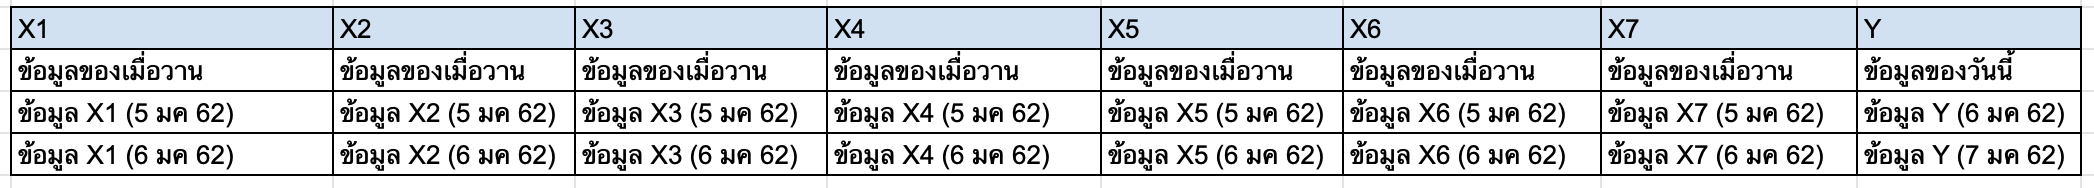

